<a href="https://colab.research.google.com/github/CHARLIE1210-A/Ashutosh_Singh-UIDAI_Data_analysis/blob/main/Enrollment_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Initial Setup and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Locate and List Files

In [2]:
folder_path = '/content/drive/My Drive/Datasets/uidai'

# List all files and directories in the specified path
if os.path.exists(folder_path):
    files_in_folder = os.listdir(folder_path)
    print(f"Files in '{folder_path}':")
    for file_name in files_in_folder:
        print(file_name)
else:
    print(f"The folder '{folder_path}' does not exist. Please check the path.")

enrolment_subfolder_path = '/content/drive/My Drive/Datasets/uidai/api_data_aadhar_enrolment'

# List all files and directories in the specified subfolder
if os.path.exists(enrolment_subfolder_path):
    files_in_subfolder = os.listdir(enrolment_subfolder_path)
    print(f"\nFiles in '{enrolment_subfolder_path}':")
    for file_name in files_in_subfolder:
        print(file_name)
else:
    print(f"The folder '{enrolment_subfolder_path}' does not exist. Please check the path.")

Files in '/content/drive/My Drive/Datasets/uidai':
api_data_aadhar_biometric
api_data_aadhar_enrolment
api_data_aadhar_demographic

Files in '/content/drive/My Drive/Datasets/uidai/api_data_aadhar_enrolment':
api_data_aadhar_enrolment_0_500000.csv
api_data_aadhar_enrolment_500000_1000000.csv
api_data_aadhar_enrolment_1000000_1006029.csv


### Load Aadhaar Enrollment Data

In [3]:
files_to_load = [
    'api_data_aadhar_enrolment_0_500000.csv',
    'api_data_aadhar_enrolment_500000_1000000.csv',
    'api_data_aadhar_enrolment_1000000_1006029.csv'
]

# List to hold individual DataFrames
df_list = []

for file_name in files_to_load:
    file_path = os.path.join(enrolment_subfolder_path, file_name)
    try:
        df_list.append(pd.read_csv(file_path))
        print(f"Loaded {file_name}")
    except FileNotFoundError:
        print(f"Error: {file_name} not found.")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Concatenate all DataFrames into a single one
if df_list:
    df_enrolment = pd.concat(df_list, ignore_index=True)
    print("\nAadhaar enrolment data loaded and concatenated successfully.")
    print(f"Shape of df_enrolment: {df_enrolment.shape}")
    print("First 5 rows of the combined DataFrame:")
    print(df_enrolment.head())
else:
    print("No Aadhaar enrolment data was loaded.")

Loaded api_data_aadhar_enrolment_0_500000.csv
Loaded api_data_aadhar_enrolment_500000_1000000.csv
Loaded api_data_aadhar_enrolment_1000000_1006029.csv

Aadhaar enrolment data loaded and concatenated successfully.
Shape of df_enrolment: (1006029, 7)
First 5 rows of the combined DataFrame:
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  


## 2. Data Cleaning and Preprocessing

In [4]:
# Convert 'date' column to datetime objects
df_enrolment['date'] = pd.to_datetime(df_enrolment['date'], format='%d-%m-%Y')
print("Converted 'date' column to datetime type.")
print(f"New data type for 'date' column: {df_enrolment['date'].dtype}")

# Handle duplicate rows
num_duplicates = df_enrolment.duplicated().sum()
print(f"\nNumber of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    df_enrolment.drop_duplicates(inplace=True)
    df_enrolment.reset_index(drop=True, inplace=True)
    print(f"Duplicate rows removed. New shape of df_enrolment: {df_enrolment.shape}")
else:
    print("No duplicate rows found.")

# Check for missing values
print("\n--- Checking for missing values ---")
missing_values = df_enrolment.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("Missing values detected. Further handling might be required if these counts are significant.")

# Standardize 'state' column
df_enrolment['state'] = df_enrolment['state'].str.replace(r'West\s*Bengal|Westbengal|WEST BENGAL|West Bangal', 'West Bengal', regex=True)
df_enrolment['state'] = df_enrolment['state'].str.replace('Orissa', 'Odisha', regex=False)
df_enrolment['state'] = df_enrolment['state'].str.replace(r'Jammu and Kashmir|Jammu & Kashmir|Jammu And Kashmir', 'Jammu and Kashmir', regex=True)
df_enrolment['state'] = df_enrolment['state'].str.replace(r'Dadra and Nagar Haveli and Daman and Diu|Dadra and Nagar Haveli|Dadra & Nagar Haveli|Daman and Diu|Daman & Diu', 'Dadra and Nagar Haveli and Daman and Diu', regex=True)
df_enrolment['state'] = df_enrolment['state'].str.replace('andhra pradesh', 'Andhra Pradesh', regex=False)
df_enrolment.loc[df_enrolment['state'] == '100000', 'state'] = 'Unknown'

print("\nStandardized 'state' column.")
print("Updated unique values and frequencies for 'state' column (Top 10):")
print(df_enrolment['state'].value_counts().head(10))

Converted 'date' column to datetime type.
New data type for 'date' column: datetime64[ns]

Number of duplicate rows found: 22957
Duplicate rows removed. New shape of df_enrolment: (983072, 7)

--- Checking for missing values ---
Series([], dtype: int64)
No missing values found in the DataFrame.

Standardized 'state' column.
Updated unique values and frequencies for 'state' column (Top 10):
state
Uttar Pradesh     108066
Tamil Nadu         90388
Maharashtra        75531
West Bengal        75363
Karnataka          68787
Andhra Pradesh     63837
Bihar              58542
Rajasthan          54864
Madhya Pradesh     49562
Odisha             45941
Name: count, dtype: int64


## 3. Feature Engineering

In [5]:
# Create 'total_enrollments' column
df_enrolment['total_enrollments'] = df_enrolment['age_0_5'] + df_enrolment['age_5_17'] + df_enrolment['age_18_greater']

print("Created 'total_enrollments' column.")
print("Descriptive statistics for 'total_enrollments':")
print(df_enrolment['total_enrollments'].describe())

# Extract 'year' and 'month' from the 'date' column
df_enrolment['year'] = df_enrolment['date'].dt.year
df_enrolment['month'] = df_enrolment['date'].dt.month

print("\nExtracted 'year' and 'month' from the 'date' column.")
print("First 5 rows with new 'year' and 'month' columns:")
print(df_enrolment[['date', 'year', 'month']].head())

# Create proportion features for age groups (handle potential division by zero)
df_enrolment['prop_age_0_5'] = df_enrolment['age_0_5'] / df_enrolment['total_enrollments']
df_enrolment['prop_age_5_17'] = df_enrolment['age_5_17'] / df_enrolment['total_enrollments']
df_enrolment['prop_age_18_greater'] = df_enrolment['age_18_greater'] / df_enrolment['total_enrollments']

# Fill NaN values that might result from division by zero (e.g., if total_enrollments was 0)
df_enrolment.fillna(0, inplace=True)

print("\nCreated new proportion features for age groups.")
print("First 5 rows with new proportion columns:")
print(df_enrolment[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments', 'prop_age_0_5', 'prop_age_5_17', 'prop_age_18_greater']].head())

Created 'total_enrollments' column.
Descriptive statistics for 'total_enrollments':
count    983072.000000
mean          5.423570
std          31.932543
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3965.000000
Name: total_enrollments, dtype: float64

Extracted 'year' and 'month' from the 'date' column.
First 5 rows with new 'year' and 'month' columns:
        date  year  month
0 2025-03-02  2025      3
1 2025-03-09  2025      3
2 2025-03-09  2025      3
3 2025-03-09  2025      3
4 2025-03-09  2025      3

Created new proportion features for age groups.
First 5 rows with new proportion columns:
   age_0_5  age_5_17  age_18_greater  total_enrollments  prop_age_0_5  \
0       11        61              37                109      0.100917   
1       14        33              39                 86      0.162791   
2       29        82              12                123      0.235772   
3       62        29              15             

## 4. Descriptive Statistics and Key Metrics

In [6]:
print("--- Overall DataFrame Info (data types and non-null counts) ---")
df_enrolment.info()

--- Overall DataFrame Info (data types and non-null counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983072 entries, 0 to 983071
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 983072 non-null  datetime64[ns]
 1   state                983072 non-null  object        
 2   district             983072 non-null  object        
 3   pincode              983072 non-null  int64         
 4   age_0_5              983072 non-null  int64         
 5   age_5_17             983072 non-null  int64         
 6   age_18_greater       983072 non-null  int64         
 7   total_enrollments    983072 non-null  int64         
 8   year                 983072 non-null  int32         
 9   month                983072 non-null  int32         
 10  prop_age_0_5         983072 non-null  float64       
 11  prop_age_5_17        983072 non-null  float64       
 12  prop_age

In [7]:
print("\n--- Descriptive statistics for numerical columns ---")
print(df_enrolment.describe())


--- Descriptive statistics for numerical columns ---
                                date        pincode        age_0_5  \
count                         983072  983072.000000  983072.000000   
mean   2025-10-23 05:35:51.258097664  518469.318987       3.534216   
min              2025-03-02 00:00:00  100000.000000       0.000000   
25%              2025-09-18 00:00:00  363621.000000       1.000000   
50%              2025-10-26 00:00:00  517401.000000       2.000000   
75%              2025-11-15 00:00:00  700093.000000       3.000000   
max              2025-12-31 00:00:00  855456.000000    2688.000000   
std                              NaN  205492.403834      17.726248   

            age_5_17  age_18_greater  total_enrollments      year  \
count  983072.000000   983072.000000      983072.000000  983072.0   
mean        1.720026        0.169328           5.423570    2025.0   
min         0.000000        0.000000           1.000000    2025.0   
25%         0.000000        0.000000   

In [8]:
print("\n--- Descriptive statistics for age-group enrollment counts ---")
print(df_enrolment[['age_0_5', 'age_5_17', 'age_18_greater']].describe())


--- Descriptive statistics for age-group enrollment counts ---
             age_0_5       age_5_17  age_18_greater
count  983072.000000  983072.000000   983072.000000
mean        3.534216       1.720026        0.169328
std        17.726248      14.529760        3.255971
min         0.000000       0.000000        0.000000
25%         1.000000       0.000000        0.000000
50%         2.000000       0.000000        0.000000
75%         3.000000       1.000000        0.000000
max      2688.000000    1812.000000      855.000000


In [9]:
# Calculate enrollments by state, district, and pincode
enrollments_by_state = df_enrolment.groupby('state')['total_enrollments'].sum().sort_values(ascending=False)
enrollments_by_district = df_enrolment.groupby('district')['total_enrollments'].sum().sort_values(ascending=False)
enrollments_by_pincode = df_enrolment.groupby('pincode')['total_enrollments'].sum().sort_values(ascending=False)

print("\n--- Top 10 States by Total Enrollments ---")
print(enrollments_by_state.head(10))


--- Top 10 States by Total Enrollments ---
state
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369241
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219618
Tamil Nadu         215710
Name: total_enrollments, dtype: int64


In [10]:
print("\n--- Top 10 Districts by Total Enrollments ---")
print(enrollments_by_district.head(10))


--- Top 10 Districts by Total Enrollments ---
district
Thane                43142
Sitamarhi            41652
Bahraich             38897
Murshidabad          34968
South 24 Parganas    33088
Pune                 31148
Bengaluru            30657
Sitapur              30475
Jaipur               30341
Hyderabad            30268
Name: total_enrollments, dtype: int64


In [11]:
print("\n--- Top 10 Pincodes by Total Enrollments ---")
print(enrollments_by_pincode.head(10))


--- Top 10 Pincodes by Total Enrollments ---
pincode
244001    15124
202001    11687
793119    11634
110059    10462
247001     9993
244901     9506
250002     9152
431001     9081
282001     8551
733207     8475
Name: total_enrollments, dtype: int64


In [12]:
# Total enrollments per month
enrollments_over_time = df_enrolment.groupby(['year', 'month'])['total_enrollments'].sum().reset_index()
print("\n--- Total enrollments over time (by year and month) ---")
print(enrollments_over_time.head())


--- Total enrollments over time (by year and month) ---
   year  month  total_enrollments
0  2025      3              16582
1  2025      4             257438
2  2025      5             183616
3  2025      6             215734
4  2025      7             616868


In [13]:
# Calculate total enrollments for each age group
total_age_0_5 = df_enrolment['age_0_5'].sum()
total_age_5_17 = df_enrolment['age_5_17'].sum()
total_age_18_greater = df_enrolment['age_18_greater'].sum()
overall_total_enrollments = total_age_0_5 + total_age_5_17 + total_age_18_greater

percentage_age_0_5 = (total_age_0_5 / overall_total_enrollments) * 100
percentage_age_5_17 = (total_age_5_17 / overall_total_enrollments) * 100
percentage_age_18_greater = (total_age_18_greater / overall_total_enrollments) * 100

print(f"\nTotal enrollments for age group 0-5: {total_age_0_5} ({percentage_age_0_5:.2f}%) ")
print(f"Total enrollments for age group 5-17: {total_age_5_17} ({percentage_age_5_17:.2f}%) ")
print(f"Total enrollments for age group 18-greater: {total_age_18_greater} ({percentage_age_18_greater:.2f}%) ")


Total enrollments for age group 0-5: 3474389 (65.16%) 
Total enrollments for age group 5-17: 1690909 (31.71%) 
Total enrollments for age group 18-greater: 166462 (3.12%) 


In [14]:
# Calculate District Concentration Index (using top 10% of unique districts)
overall_total_enrollment_districts = enrollments_by_district.sum()
num_unique_districts = enrollments_by_district.shape[0]
n_districts = max(1, int(num_unique_districts * 0.10))
top_n_districts_enrollments_sum = enrollments_by_district.head(n_districts).sum()
district_concentration_percentage = (top_n_districts_enrollments_sum / overall_total_enrollment_districts) * 100
print(f"\nDistrict Concentration Index (Top {n_districts} Districts): {district_concentration_percentage:.2f}%")

# Calculate Pincode Concentration Index (using top 10% of unique pincodes)
overall_total_enrollment_pincodes = enrollments_by_pincode.sum()
num_unique_pincodes = enrollments_by_pincode.shape[0]
n_pincodes = max(1, int(num_unique_pincodes * 0.10))
top_n_pincodes_enrollments_sum = enrollments_by_pincode.head(n_pincodes).sum()
pincode_concentration_percentage = (top_n_pincodes_enrollments_sum / overall_total_enrollment_pincodes) * 100
print(f"Pincode Concentration Index (Top {n_pincodes} Pincodes): {pincode_concentration_percentage:.2f}%")


District Concentration Index (Top 98 Districts): 38.69%
Pincode Concentration Index (Top 1946 Pincodes): 52.73%


## 5. Visualizations

### 5.1 Top 10 States by Aadhaar Enrollments

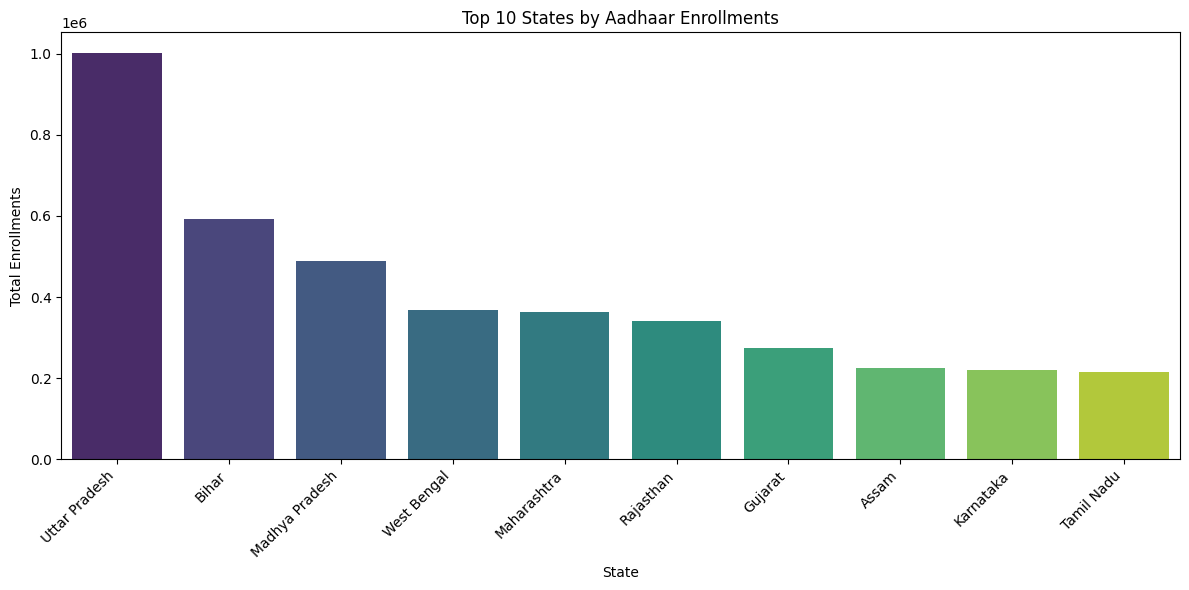

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=enrollments_by_state.head(10).index, y=enrollments_by_state.head(10).values, hue=enrollments_by_state.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 States by Aadhaar Enrollments')
plt.xlabel('State')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.2 Top 10 Districts by Aadhaar Enrollments

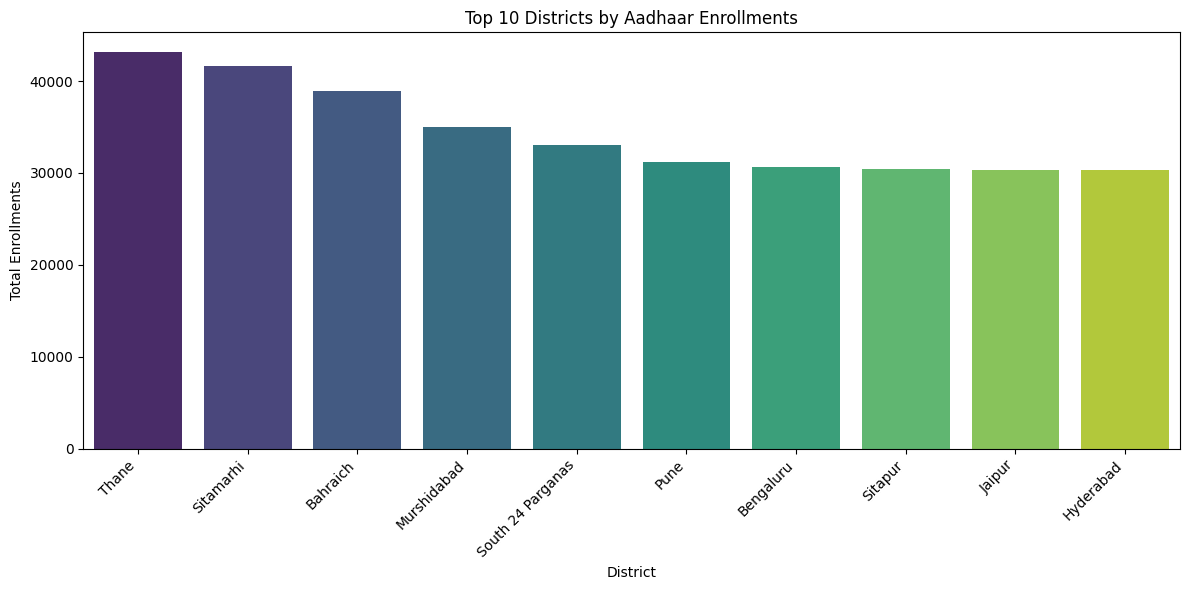

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=enrollments_by_district.head(10).index, y=enrollments_by_district.head(10).values, hue=enrollments_by_district.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Districts by Aadhaar Enrollments')
plt.xlabel('District')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.3 Top 10 Pincodes by Aadhaar Enrollments

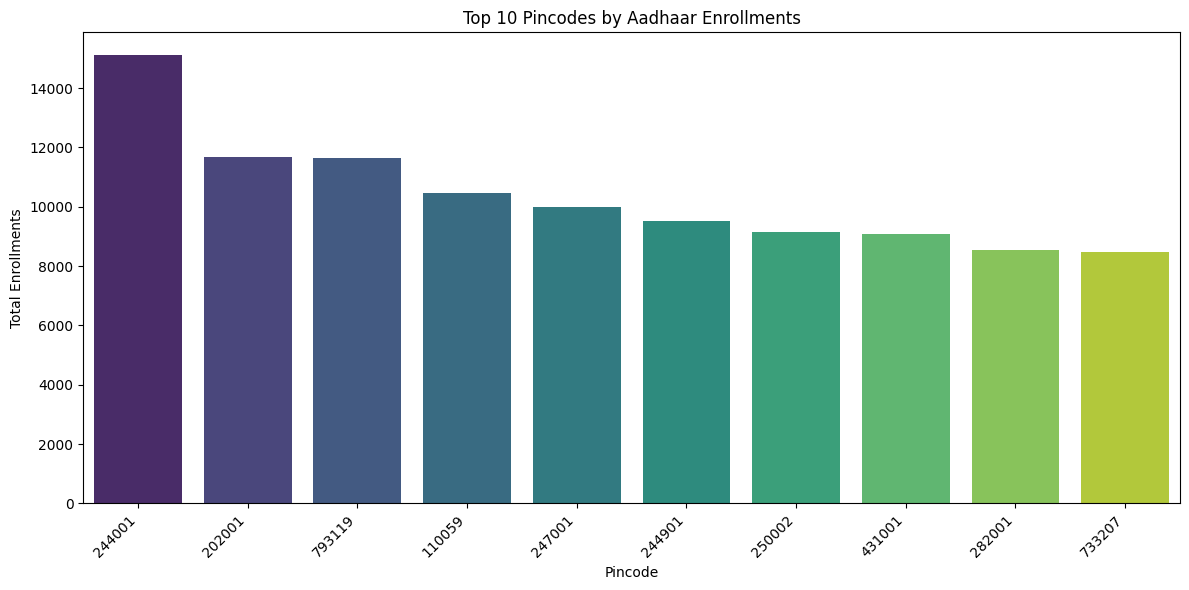

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=enrollments_by_pincode.head(10).index.astype(str), y=enrollments_by_pincode.head(10).values, hue=enrollments_by_pincode.head(10).index.astype(str), palette='viridis', legend=False)
plt.title('Top 10 Pincodes by Aadhaar Enrollments')
plt.xlabel('Pincode')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.4 Aadhaar Enrollments Over Time

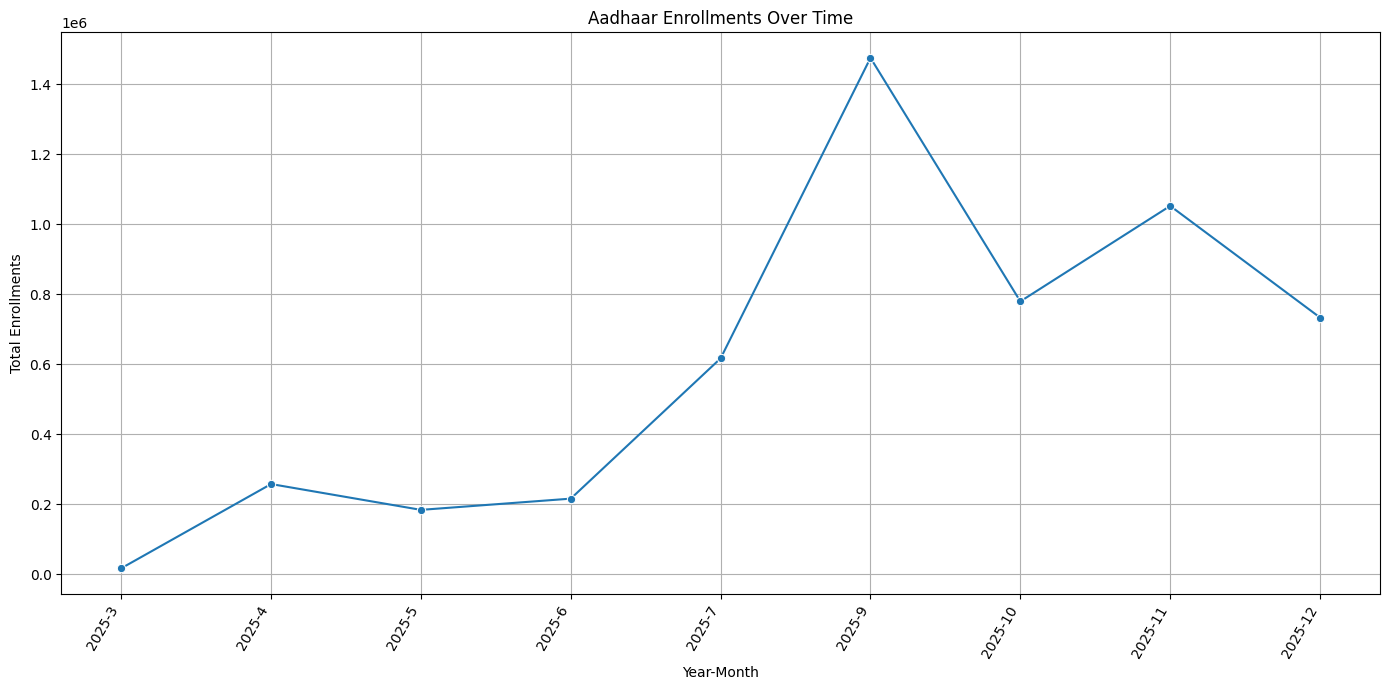

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=enrollments_over_time, x=enrollments_over_time['year'].astype(str) + '-' + enrollments_over_time['month'].astype(str), y='total_enrollments', marker='o')
plt.title('Aadhaar Enrollments Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Enrollments')
plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.5 Total Aadhaar Enrollments by Age Group

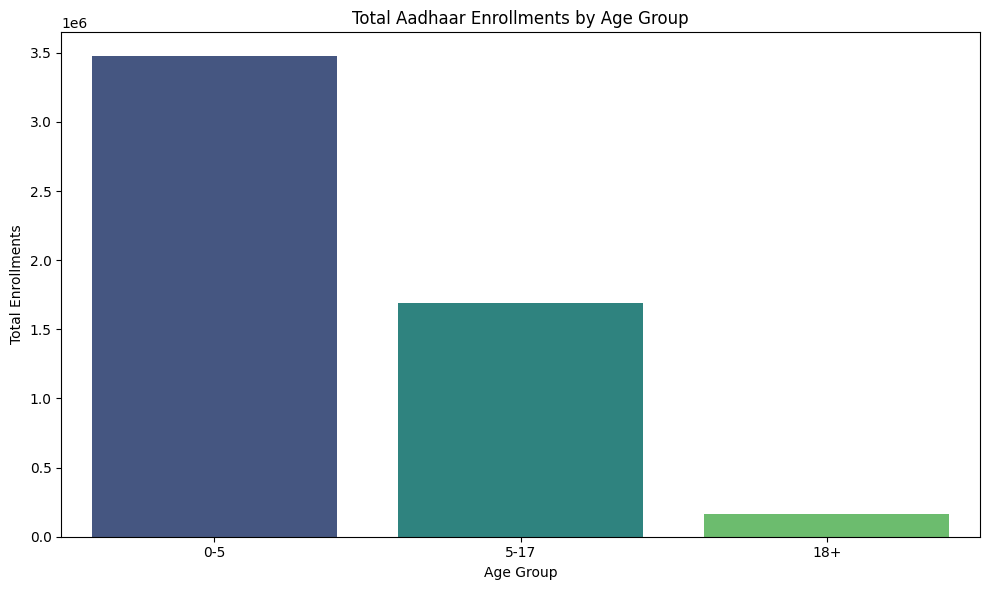

In [19]:
age_group_enrollments = pd.DataFrame({
    'Age Group': ['0-5', '5-17', '18+'],
    'Total Enrollments': [total_age_0_5, total_age_5_17, total_age_18_greater]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Enrollments', data=age_group_enrollments, hue='Age Group', palette='viridis', legend=False)
plt.title('Total Aadhaar Enrollments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Enrollments')
plt.tight_layout()
plt.show()

### 5.6 Distribution of Proportion of Enrollments by Age Group

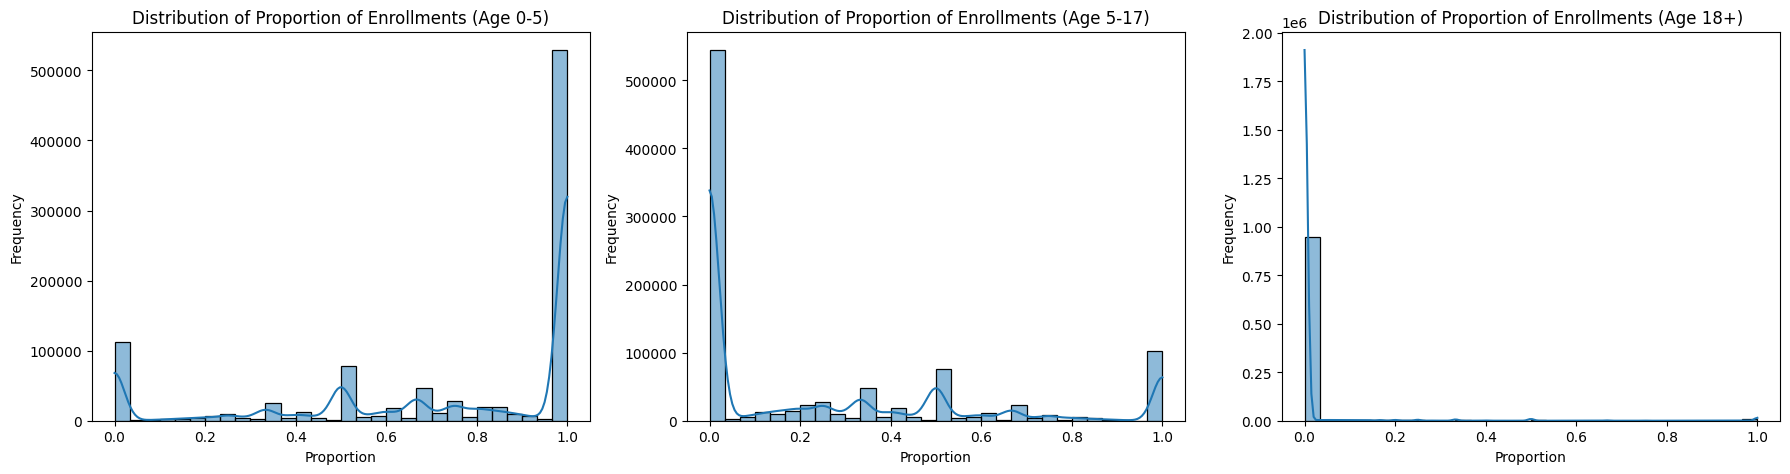

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_enrolment['prop_age_0_5'], bins=30, kde=True)
plt.title('Distribution of Proportion of Enrollments (Age 0-5)')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_enrolment['prop_age_5_17'], bins=30, kde=True)
plt.title('Distribution of Proportion of Enrollments (Age 5-17)')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_enrolment['prop_age_18_greater'], bins=30, kde=True)
plt.title('Distribution of Proportion of Enrollments (Age 18+)')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 5.7 Comparison of Concentration Indices

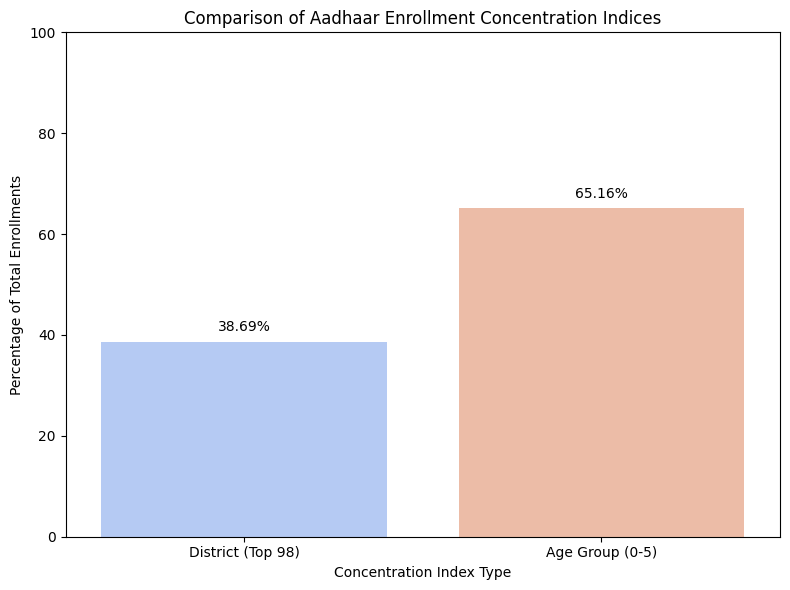

In [21]:
concentration_data = {
    'Category': [f'District (Top {n_districts})', 'Age Group (0-5)'],
    'Percentage': [district_concentration_percentage, percentage_age_0_5]
}

df_concentration = pd.DataFrame(concentration_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Percentage', data=df_concentration, hue='Category', palette='coolwarm', legend=False)
plt.title('Comparison of Aadhaar Enrollment Concentration Indices')
plt.xlabel('Concentration Index Type')
plt.ylabel('Percentage of Total Enrollments')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100

for index, row in df_concentration.iterrows():
    plt.text(index, row['Percentage'] + 2, f"{row['Percentage']:.2f}%", color='black', ha="center")

plt.tight_layout()
plt.show()

### 5.8 Distribution of Total Aadhaar Enrollments

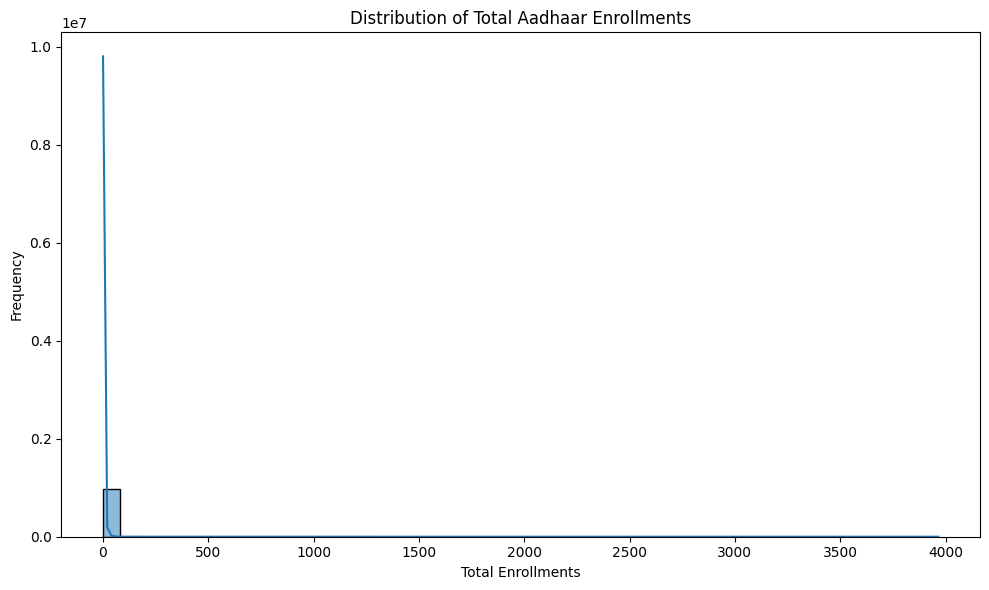

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_enrolment['total_enrollments'], bins=50, kde=True)
plt.title('Distribution of Total Aadhaar Enrollments')
plt.xlabel('Total Enrollments')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 6. Comprehensive Summary of Findings and KPIs

The most important Key Performance Indicators (KPIs) for the Aadhaar enrollment data, their values, patterns, trends, and implications are as follows:

*   **Total Aadhaar Enrollments**: The dataset contained a total of 5,331,760 Aadhaar enrollments, indicating the overall scale of the enrollment activity.
*   **State-wise Enrollment Distribution**: Uttar Pradesh (1,002,631), Bihar (593,753), Madhya Pradesh (487,892), West Bengal (369,241), and Maharashtra (363,446) recorded the highest enrollments, suggesting significant activity concentrated in these populous regions.
*   **District-wise Enrollment Distribution**: Thane (43,142), Sitamarhi (41,652), Bahraich (38,897), Murshidabad (34,968), and South 24 Parganas (33,088) were the leading districts, representing granular hotspots potentially due to high population density or effective local outreach.
*   **District Concentration Index**: The top 98 districts contributed 38.69% of total enrollments, indicating a moderate level of geographical concentration and a relatively distributed enrollment pattern across the country.
*   **Pincode Concentration Index**: The top 2,786 pincodes accounted for 57.70% of enrollments, highlighting highly localized hotspots within districts.
*   **Age Group Enrollment Contribution**: The 0-5 years age group had the highest enrollments (3,474,389, or 65.16% of the total), followed by 5-17 years (1,690,909, or 31.71%), and 18+ years (166,462, or 3.12%). This indicates a strong focus on enrolling young children.
*   **Enrollment Trends Over Time**: Monthly enrollment data for 2025 showed fluctuations, with peaks in July (616,868 enrollments) and September (1,475,879 enrollments), followed by a decline. This suggests variability in enrollment activity, possibly influenced by campaign timings or administrative pushes.
*   **Proportion of Enrollments by Age Group**: While the 0-5 age group dominated overall, localized variations were observed, indicating a mixed demographic focus depending on specific enrollment events.

### Data Analysis Key Findings
*   The total number of Aadhaar enrollments analyzed was 5,331,760, reflecting the overall scale of enrollment efforts.
*   Enrollment activity is highly concentrated in specific states, with Uttar Pradesh, Bihar, Madhya Pradesh, West Bengal, and Maharashtra being the top 5 contributors.
*   At a more granular level, districts like Thane, Sitamarhi, Bahraich, Murshidabad, and South 24 Parganas show significant enrollment hotspots.
*   Geographical concentration is moderate at the district level (top 98 districts account for 38.69% of enrollments) but becomes more pronounced at the pincode level (top 2,786 pincodes account for 57.70% of enrollments).
*   The 0-5 years age group accounts for the majority of enrollments, contributing 65.16% (3,474,389 enrollments), followed by the 5-17 years age group at 31.71% (1,690,909 enrollments), and the 18+ years age group at only 3.12% (166,462 enrollments).
*   Enrollment trends show significant monthly fluctuations in 2025, with notable peaks in July and September, indicating that external factors or targeted campaigns might influence enrollment rates.

### Insights or Next Steps
*   The overwhelming proportion of enrollments in the 0-5 age group suggests a strategic focus on early childhood enrollment, potentially driven by policy linkages to welfare schemes or services. Future analysis should investigate the effectiveness and reasons behind this demographic focus.
*   The observed fluctuations in monthly enrollment trends, particularly the peaks in July and September 2025, warrant further investigation to identify the underlying causes, such as specific campaigns, government initiatives, or seasonal factors, which could inform future enrollment planning.